# simple linear regression

In [13]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('realtor-data.csv')
data

,bed,bathroom,house_size,price,acre_lot
0,3.0,2.0,920.0,105000.0,0.12
1,4.0,2.0,1527.0,80000.0,0.08
2,2.0,1.0,748.0,67000.0,0.15
3,4.0,2.0,1800.0,145000.0,0.10
4,6.0,2.0,NaN,65000.0,0.05
...,...,...,...,...,...
904961,2.0,2.0,NaN,359000.0,NaN
904962,2.0,2.0,1200.0,299000.0,NaN
904963,NaN,1.0,NaN,120000.0,NaN
904964,3.0,2.0,NaN,449000.0,NaN


array([[<Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bathroom'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'house_size'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

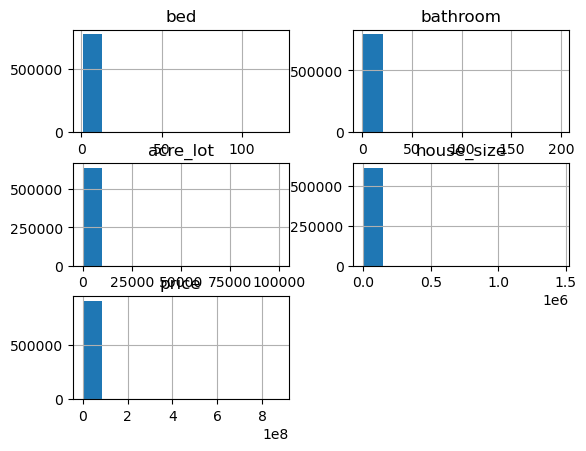

In [7]:
data.hist()


In [9]:
data.describe()

,bed,bathroom,acre_lot,house_size,price
count,775126.000000,791082.000000,638324.000000,6.120800e+05,9.048950e+05
mean,3.332190,2.484236,17.317292,2.138437e+03,8.774382e+05
std,2.065312,1.931622,970.707378,3.046600e+03,2.457698e+06
min,1.000000,1.000000,0.000000,1.000000e+02,0.000000e+00
25%,2.000000,2.000000,0.110000,1.132000e+03,2.685000e+05
50%,3.000000,2.000000,0.290000,1.650000e+03,4.750000e+05
75%,4.000000,3.000000,1.150000,2.495000e+03,8.300000e+05
max,123.000000,198.000000,100000.000000,1.450112e+06,8.750000e+08


In [10]:
data.isna().sum()

bed           129840
bathroom      113884
acre_lot      266642
house_size    292886
price             71
dtype: int64

In [22]:
data = data.fillna(method='bfill')
data.isna().sum()

bed            0
bathroom       0
house_size     0
price          0
acre_lot      25
dtype: int64

In [29]:
x=data.iloc[:,2:3]
x

,house_size
0,920.0
1,1527.0
2,748.0
3,1800.0
4,2520.0
...,...
904961,1200.0
904962,1200.0
904963,1677.0
904964,1677.0


In [30]:
y=data.iloc[:,3:4]
y

,price
0,105000.0
1,80000.0
2,67000.0
3,145000.0
4,65000.0
...,...
904961,359000.0
904962,299000.0
904963,120000.0
904964,449000.0


In [31]:
data.corr()

,bed,bathroom,house_size,price,acre_lot
bed,1.000000,0.695746,0.283310,0.141371,-0.001132
bathroom,0.695746,1.000000,0.294406,0.249953,-0.000148
house_size,0.283310,0.294406,1.000000,0.121250,0.028770
price,0.141371,0.249953,0.121250,1.000000,0.000348
acre_lot,-0.001132,-0.000148,0.028770,0.000348,1.000000


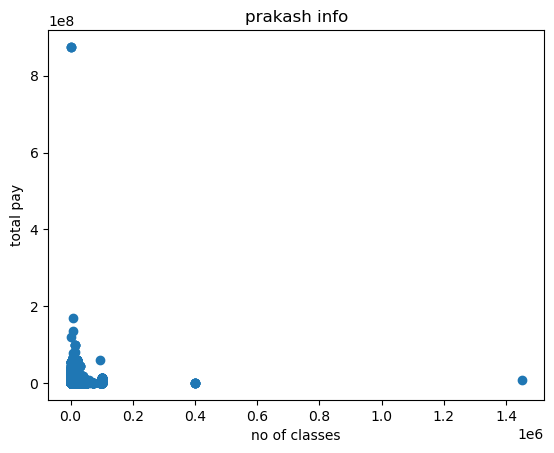

In [32]:
plt.scatter(x,y)
plt.title('prakash info')
plt.xlabel('no of classes')
plt.ylabel('total pay')
plt.show()

In [58]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
data.shape

(904966, 5)

In [36]:
xtrain.shape

(723972, 1)

In [37]:
xtest.shape

(180994, 1)

In [59]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(xtrain,ytrain)
ypred = lin_reg.predict(xtest)
print("The predictied values are\n ", ypred)

The predictied values are
  [[ 566458.53552738]
 [ 757591.91379808]
 [ 466025.65500536]
 ...
 [1046326.33079736]
 [ 756507.37864315]
 [1087719.42254397]]


In [42]:
diff = ytest - ypred
diff

,price
213901,-2.446498e+05
746686,-4.657129e+06
627173,-4.455632e+05
472382,-2.842316e+05
681630,-7.695333e+05
...,...
786066,-8.272431e+04
297173,9.490014e+05
392271,-5.074804e+05
299576,-3.000559e+05


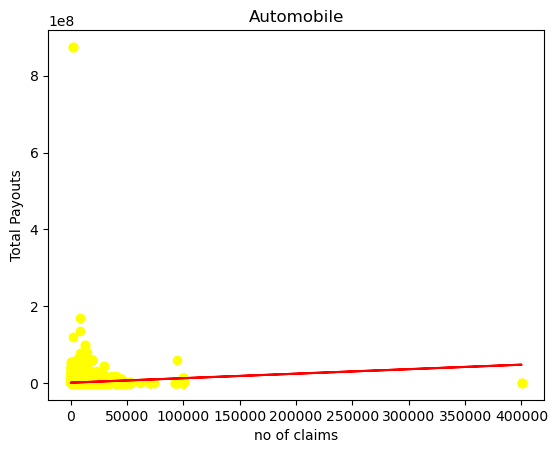

In [43]:
plt.scatter(xtrain,ytrain,color='yellow')
plt.plot(xtrain,lin_reg.predict(xtrain),color='red')
plt.title('Automobile')
plt.xlabel('no of claims')
plt.ylabel('Total Payouts')
plt.show()

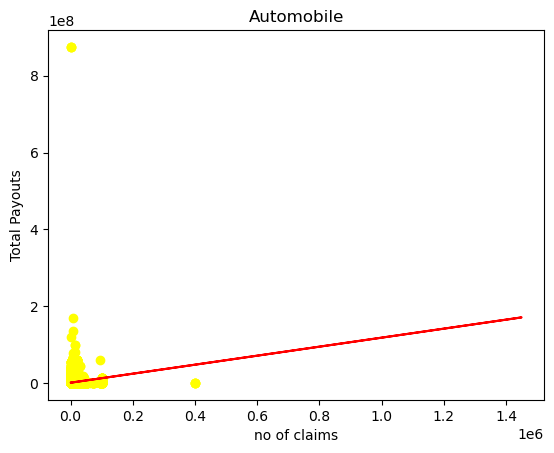

In [44]:
plt.scatter(xtrain,ytrain,color='yellow')
plt.plot(xtest,lin_reg.predict(xtest),color='red')
plt.title('Automobile')
plt.xlabel('no of claims')
plt.ylabel('Total Payouts')
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('Variance Score:\t',explained_variance_score (ytest,ypred))
print()
print('R_Square: \t', r2_score(ytest,ypred))

Mean Squared Error: 	 3675927474569.5884

RMSE: 	 1917270.8401708894

Variance Score:	 -0.008293406135486237

R_Square: 	 -0.008306225274245627


In [53]:
x=data.iloc[:,0:3]
x

,bed,bathroom,house_size
0,3.0,2.0,920.0
1,4.0,2.0,1527.0
2,2.0,1.0,748.0
3,4.0,2.0,1800.0
4,6.0,2.0,2520.0
...,...,...,...
904961,2.0,2.0,1200.0
904962,2.0,2.0,1200.0
904963,3.0,1.0,1677.0
904964,3.0,2.0,1677.0


In [52]:
y=data.iloc[:,3:4]
y

,price
0,105000.0
1,80000.0
2,67000.0
3,145000.0
4,65000.0
...,...
904961,359000.0
904962,299000.0
904963,120000.0
904964,449000.0


In [54]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(xtrain,ytrain)
ypred = lin_reg.predict(xtest)
print("The predictied values are\n ", ypred)

The predictied values are
  [[ 566458.53552738]
 [ 757591.91379808]
 [ 466025.65500536]
 ...
 [1046326.33079736]
 [ 756507.37864315]
 [1087719.42254397]]


In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest,ypred)))
print()
print('Variance Score:\t',explained_variance_score (ytest,ypred))
print()
print('R_Square: \t', r2_score(ytest,ypred))

Mean Squared Error: 	 3117962259558.435

RMSE: 	 1765775.2573751947

Variance Score:	 0.11913739417648395

R_Square: 	 0.11913608052129454
